[View in Colaboratory](https://colab.research.google.com/github/dattarajrao/PredixDeepLearning/blob/master/Fashion_MNIST.ipynb)

# **Keras and TensorFlow - Fashion data Classification example.**

### `Import libraries. Check if GPU is available.`

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print("GPU status: ",tf.test.gpu_device_name())

1.10.1
GPU status:  /device:GPU:0


### `Import the fashion dataset and see some sample images with labels.`




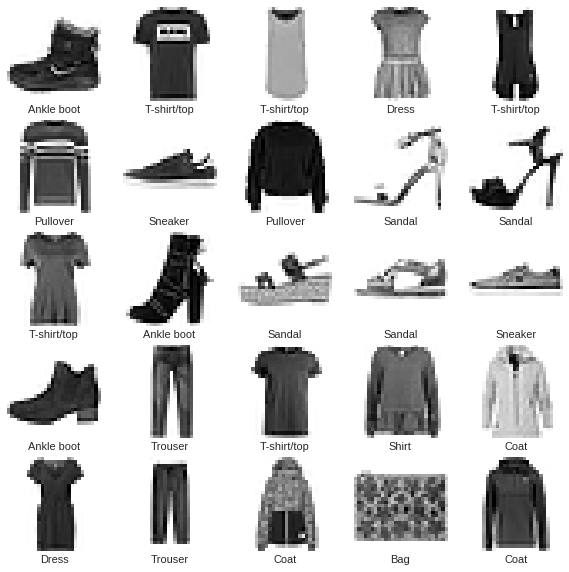

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### `Build a Keras Model and train it on training dataset.`


In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.4933 - acc: 0.8272
Epoch 2/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3712 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3372 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3143 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2949 - acc: 0.8909


### `Evaluate the Model on test data and get Metrics.`


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/step
Test accuracy: 0.8667
